In [1]:
from modules.experiment_helper import parse_experiment_settings

In [1]:
from modules.model_inspector import _get_plt_as_RGB_matrix

NameError: name 'profile' is not defined

In [3]:
from modules.model_inspector import _get_plt_as_RGB_matrix, _plt_to_np_array

In [8]:
_= _get_plt_as_RGB_matrix(plt)

(480, 640, 3)


In [12]:
_= _plt_to_np_array(plt, dpi=30)

(144, 192, 4)


<Figure size 640x480 with 0 Axes>

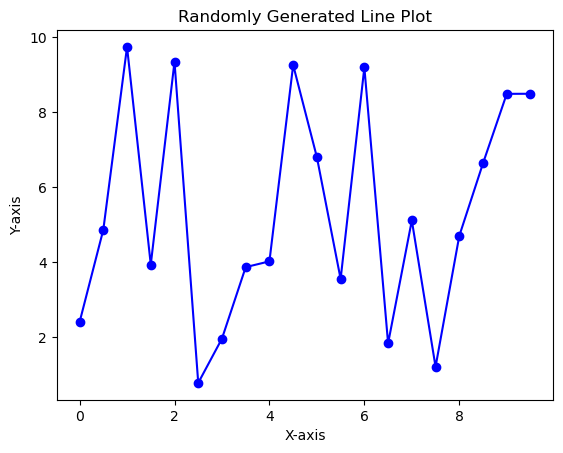

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def generate_random_plot():
    # 產生隨機數據
    x = np.arange(0, 10, 0.5)
    y = np.random.rand(len(x)) * 10

    # 建立折線圖
    plt.figure()
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.title("Randomly Generated Line Plot")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")

    return plt

# 生成並顯示圖像
plt = generate_random_plot()
plt.show()

In [4]:
len(parse_experiment_settings('experiments'))

24

In [22]:
kernel = torch.randn([10, 10])*0.1+0.01
kernel.abs().sum(dim=1)

tensor([1.3594, 0.7369, 0.7152, 0.9744, 1.1110, 0.9492, 1.1617, 0.9974, 0.5453,
        0.9701])

In [17]:
normalized_kernel = torch.nn.functional.normalize(
    kernel, p=1, dim=1
)
normalized_kernel

tensor([[-0.2430,  0.0122, -0.0542,  0.2388,  0.0905, -0.0762,  0.0411,  0.1118,
         -0.0530, -0.0791],
        [ 0.0694, -0.3012,  0.0063, -0.0099,  0.0810, -0.0834, -0.2825,  0.0910,
         -0.0284,  0.0467],
        [-0.0092, -0.2467, -0.1154, -0.0271, -0.0280,  0.1774, -0.1924,  0.0119,
          0.0798,  0.1121],
        [ 0.0171,  0.0734, -0.0133, -0.2382,  0.0835,  0.0442,  0.0764, -0.1905,
         -0.2170, -0.0464],
        [-0.1132,  0.0564,  0.1198,  0.1254,  0.0503, -0.1135, -0.2803,  0.0294,
         -0.0843,  0.0272],
        [ 0.1284, -0.0479, -0.1431, -0.0441,  0.1523, -0.0534, -0.0653, -0.2276,
         -0.0312,  0.1068],
        [-0.2437,  0.0635, -0.0329, -0.0522,  0.1557, -0.0485, -0.1465,  0.1565,
         -0.0226, -0.0779],
        [ 0.0548,  0.1376, -0.0902,  0.0386,  0.2573,  0.0941,  0.0469, -0.0311,
         -0.0603,  0.1890],
        [ 0.2037, -0.1198,  0.1309,  0.0156,  0.0600, -0.0088,  0.1017,  0.0405,
          0.1819, -0.1371],
        [-0.0364,  

In [18]:
normalized_kernel.abs().sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [35]:
see = torch.zeros([5, 5])
see

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [51]:
thresholds = torch.rand([10])
minimal_threshold=0.5
thresholds

tensor([0.1073, 0.7836, 0.6329, 0.2751, 0.7782, 0.7403, 0.7257, 0.4354, 0.8848,
        0.2436])

In [59]:
valid_thresholds_mask = thresholds >= minimal_threshold
valid_thresholds_mask

tensor([False,  True,  True, False,  True,  True,  True, False,  True, False])

In [72]:
valid_thresholds_mask.size(0)

10

In [73]:
torch.tensor([])

tensor([])

In [61]:
~valid_thresholds_mask

tensor([ True, False, False,  True, False, False, False,  True, False,  True])

In [74]:
removed_indices = torch.where(~valid_thresholds_mask)[0]
removed_indices

tensor([0, 3, 7, 9])

In [78]:
removed_receiver_indices = [removed_indices+10, removed_indices+20]
removed_receiver_indices

[tensor([10, 13, 17, 19]), tensor([20, 23, 27, 29])]

In [79]:
torch.cat(removed_receiver_indices)

tensor([10, 13, 17, 19, 20, 23, 27, 29])

In [ ]:
# Remove any extra dimensions (if applicable) and convert to a NumPy array
removed_indices_np = torch.squeeze(small_threshold_indices, dim=-1).numpy()

TypeError: squeeze() received an invalid combination of arguments - got (tuple, dim=int), but expected one of:
 * (Tensor input)
 * (Tensor input, int dim)
      didn't match because some of the arguments have invalid types: (!tuple of (Tensor,)!, dim=int)
 * (Tensor input, tuple of ints dim)
      didn't match because some of the arguments have invalid types: (!tuple of (Tensor,)!, !dim=int!)
 * (Tensor input, name dim)
      didn't match because some of the arguments have invalid types: (!tuple of (Tensor,)!, !dim=int!)


In [ ]:
# Create a boolean mask for thresholds greater than or equal to the minimal threshold
valid_thresholds_mask = self.thresholds >= self.minimal_threshold

# Apply the mask to threshold_values to filter out small thresholds
self.threshold_values = self.threshold_values[valid_thresholds_mask]

torch.float32

In [14]:
# Sets up Gpu use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.manual_seed_all(seed)
torch.set_num_threads(os.cpu_count() - 1)

print(f'Running on Device {device}')

Running on Device cuda


In [15]:
# Determines number of workers to use
if n_workers == -1:
    n_workers = 0  # gpu * 4 * torch.cuda.device_count()

if not train:
    update_interval = n_test

In [16]:
n_sqrt = int(np.ceil(np.sqrt(n_neurons)))
start_intensity = intensity

In [17]:

# Build network.
network = DiehlAndCook2015(
    n_inpt=784,
    n_neurons=n_neurons,
    exc=exc,
    inh=inh,
    dt=dt,
    norm=78.4,
    theta_plus=theta_plus,
    inpt_shape=(1, 28, 28),
)
network.to(device)


DiehlAndCook2015(
  (X): Input()
  (Ae): DiehlAndCookNodes()
  (Ai): LIFNodes()
  (X_to_Ae): Connection(
    (source): Input()
    (target): DiehlAndCookNodes()
  )
  (Ae_to_Ai): Connection(
    (source): DiehlAndCookNodes()
    (target): LIFNodes()
  )
  (Ai_to_Ae): Connection(
    (source): LIFNodes()
    (target): DiehlAndCookNodes()
  )
)

In [18]:
# Load MNIST data.
train_dataset = MNIST(
    PoissonEncoder(time=time, dt=dt),
    None,
    root=os.path.join("..", "..", "data", "MNIST"),
    download=True,
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    ),
)

In [19]:
# Record spikes during the simulation.
spike_record = torch.zeros((update_interval, int(time / dt), n_neurons), device=device)
spike_record.shape

torch.Size([250, 250, 100])

In [20]:
# Neuron assignments and spike proportions.
n_classes = 10
assignments = -torch.ones(n_neurons, device=device)
proportions = torch.zeros((n_neurons, n_classes), device=device)
rates = torch.zeros((n_neurons, n_classes), device=device)

In [21]:
# Sequence of accuracy estimates.
accuracy = {"all": [], "proportion": []}

In [22]:
# Voltage recording for excitatory and inhibitory layers.
exc_voltage_monitor = Monitor(
    network.layers["Ae"], ["v"], time=int(time / dt), device=device
)
inh_voltage_monitor = Monitor(
    network.layers["Ai"], ["v"], time=int(time / dt), device=device
)
network.add_monitor(exc_voltage_monitor, name="exc_voltage")
network.add_monitor(inh_voltage_monitor, name="inh_voltage")

In [23]:
# Set up monitors for spikes and voltages
spikes = {}
for layer in set(network.layers):
    spikes[layer] = Monitor(
        network.layers[layer], state_vars=["s"], time=int(time / dt), device=device
    )
    network.add_monitor(spikes[layer], name="%s_spikes" % layer)

voltages = {}
for layer in set(network.layers) - {"X"}:
    voltages[layer] = Monitor(
        network.layers[layer], state_vars=["v"], time=int(time / dt), device=device
    )
    network.add_monitor(voltages[layer], name="%s_voltages" % layer)

In [ ]:
inpt_ims, inpt_axes = None, None
spike_ims, spike_axes = None, None
weights_im = None
assigns_im = None
perf_ax = None
voltage_axes, voltage_ims = None, None

# Train the network.
print("\nBegin training.\n")
start = t()
for epoch in range(n_epochs):
    labels = []

    if epoch % progress_interval == 0:
        print("Progress: %d / %d (%.4f seconds)" % (epoch, n_epochs, t() - start))
        start = t()

    # Create a dataloader to iterate and batch data
    dataloader = torch.utils.data.DataLoader(
        train_dataset, batch_size=1, shuffle=True, num_workers=n_workers, pin_memory=gpu
    )

    for step, batch in enumerate(tqdm(dataloader)):
        if step > n_train:
            break
        # Get next input sample.
        inputs = {"X": batch["encoded_image"].view(int(time / dt), 1, 1, 28, 28)}
        if gpu:
            inputs = {k: v.cuda() for k, v in inputs.items()}

        if step % update_interval == 0 and step > 0:
            # Convert the array of labels into a tensor
            label_tensor = torch.tensor(labels, device=device)

            # Get network predictions.
            all_activity_pred = all_activity(
                spikes=spike_record, assignments=assignments, n_labels=n_classes
            )
            proportion_pred = proportion_weighting(
                spikes=spike_record,
                assignments=assignments,
                proportions=proportions,
                n_labels=n_classes,
            )

            # Compute network accuracy according to available classification strategies.
            accuracy["all"].append(
                100
                * torch.sum(label_tensor.long() == all_activity_pred).item()
                / len(label_tensor)
            )
            accuracy["proportion"].append(
                100
                * torch.sum(label_tensor.long() == proportion_pred).item()
                / len(label_tensor)
            )

            print(
                "\nAll activity accuracy: %.2f (last), %.2f (average), %.2f (best)"
                % (
                    accuracy["all"][-1],
                    np.mean(accuracy["all"]),
                    np.max(accuracy["all"]),
                )
            )
            print(
                "Proportion weighting accuracy: %.2f (last), %.2f (average), %.2f"
                " (best)\n"
                % (
                    accuracy["proportion"][-1],
                    np.mean(accuracy["proportion"]),
                    np.max(accuracy["proportion"]),
                )
            )

            # Assign labels to excitatory layer neurons.
            assignments, proportions, rates = assign_labels(
                spikes=spike_record,
                labels=label_tensor,
                n_labels=n_classes,
                rates=rates,
            )

            labels = []

        labels.append(batch["label"])

        # Run the network on the input.
        network.run(inputs=inputs, time=time)

        # Get voltage recording.
        exc_voltages = exc_voltage_monitor.get("v")
        inh_voltages = inh_voltage_monitor.get("v")

        # Add to spikes recording.
        spike_record[step % update_interval] = spikes["Ae"].get("s").squeeze()

        # Optionally plot various simulation information.
        if plot:
            image = batch["image"].view(28, 28)
            inpt = inputs["X"].view(time, 784).sum(0).view(28, 28)
            input_exc_weights = network.connections[("X", "Ae")].w
            square_weights = get_square_weights(
                input_exc_weights.view(784, n_neurons), n_sqrt, 28
            )
            square_assignments = get_square_assignments(assignments, n_sqrt)
            spikes_ = {layer: spikes[layer].get("s") for layer in spikes}
            voltages = {"Ae": exc_voltages, "Ai": inh_voltages}
            inpt_axes, inpt_ims = plot_input(
                image, inpt, label=batch["label"], axes=inpt_axes, ims=inpt_ims
            )
            spike_ims, spike_axes = plot_spikes(spikes_, ims=spike_ims, axes=spike_axes)
            weights_im = plot_weights(square_weights, im=weights_im)
            assigns_im = plot_assignments(square_assignments, im=assigns_im)
            perf_ax = plot_performance(accuracy, x_scale=update_interval, ax=perf_ax)
            voltage_ims, voltage_axes = plot_voltages(
                voltages, ims=voltage_ims, axes=voltage_axes, plot_type="line"
            )

            plt.pause(1e-8)

        network.reset_state_variables()  # Reset state variables.

print("Progress: %d / %d (%.4f seconds)" % (epoch + 1, n_epochs, t() - start))
print("Training complete.\n")


Begin training.

Progress: 0 / 1 (0.0024 seconds)


  0%|▏                                   | 250/60000 [02:48<11:10:17,  1.49it/s]


All activity accuracy: 11.60 (last), 11.60 (average), 11.60 (best)
Proportion weighting accuracy: 11.60 (last), 11.60 (average), 11.60 (best)



  1%|▎                                   | 500/60000 [05:42<11:05:28,  1.49it/s]


All activity accuracy: 19.60 (last), 15.60 (average), 19.60 (best)
Proportion weighting accuracy: 25.60 (last), 18.60 (average), 25.60 (best)



  1%|▍                                   | 750/60000 [08:36<11:16:36,  1.46it/s]


All activity accuracy: 35.20 (last), 22.13 (average), 35.20 (best)
Proportion weighting accuracy: 37.20 (last), 24.80 (average), 37.20 (best)



  2%|▌                                  | 1000/60000 [11:32<11:18:04,  1.45it/s]


All activity accuracy: 24.40 (last), 22.70 (average), 35.20 (best)
Proportion weighting accuracy: 29.20 (last), 25.90 (average), 37.20 (best)



  2%|▋                                  | 1250/60000 [14:25<11:11:25,  1.46it/s]


All activity accuracy: 24.80 (last), 23.12 (average), 35.20 (best)
Proportion weighting accuracy: 24.00 (last), 25.52 (average), 37.20 (best)



  2%|▉                                  | 1500/60000 [17:17<11:06:33,  1.46it/s]


All activity accuracy: 38.40 (last), 25.67 (average), 38.40 (best)
Proportion weighting accuracy: 38.40 (last), 27.67 (average), 38.40 (best)



  3%|█                                  | 1750/60000 [20:08<11:07:52,  1.45it/s]


All activity accuracy: 36.80 (last), 27.26 (average), 38.40 (best)
Proportion weighting accuracy: 40.40 (last), 29.49 (average), 40.40 (best)



  3%|█▏                                 | 2000/60000 [23:00<11:15:26,  1.43it/s]


All activity accuracy: 48.40 (last), 29.90 (average), 48.40 (best)
Proportion weighting accuracy: 48.00 (last), 31.80 (average), 48.00 (best)



  4%|█▎                                 | 2250/60000 [25:53<10:51:46,  1.48it/s]


All activity accuracy: 76.80 (last), 35.11 (average), 76.80 (best)
Proportion weighting accuracy: 77.60 (last), 36.89 (average), 77.60 (best)



  4%|█▍                                 | 2500/60000 [28:46<11:02:16,  1.45it/s]


All activity accuracy: 77.60 (last), 39.36 (average), 77.60 (best)
Proportion weighting accuracy: 78.40 (last), 41.04 (average), 78.40 (best)



  5%|█▌                                 | 2750/60000 [31:41<11:11:08,  1.42it/s]


All activity accuracy: 76.80 (last), 42.76 (average), 77.60 (best)
Proportion weighting accuracy: 77.20 (last), 44.33 (average), 78.40 (best)



  5%|█▊                                 | 3000/60000 [34:35<10:59:48,  1.44it/s]


All activity accuracy: 74.40 (last), 45.40 (average), 77.60 (best)
Proportion weighting accuracy: 76.00 (last), 46.97 (average), 78.40 (best)



  5%|█▉                                 | 3250/60000 [37:28<11:01:28,  1.43it/s]


All activity accuracy: 74.80 (last), 47.66 (average), 77.60 (best)
Proportion weighting accuracy: 75.60 (last), 49.17 (average), 78.40 (best)



  6%|██                                 | 3500/60000 [40:21<10:46:07,  1.46it/s]


All activity accuracy: 82.40 (last), 50.14 (average), 82.40 (best)
Proportion weighting accuracy: 82.40 (last), 51.54 (average), 82.40 (best)



  6%|██▏                                | 3750/60000 [43:14<10:30:44,  1.49it/s]


All activity accuracy: 75.60 (last), 51.84 (average), 82.40 (best)
Proportion weighting accuracy: 75.60 (last), 53.15 (average), 82.40 (best)



  7%|██▎                                | 4000/60000 [46:05<10:41:27,  1.46it/s]


All activity accuracy: 82.40 (last), 53.75 (average), 82.40 (best)
Proportion weighting accuracy: 82.80 (last), 55.00 (average), 82.80 (best)



  7%|██▍                                | 4250/60000 [48:57<10:38:14,  1.46it/s]


All activity accuracy: 83.20 (last), 55.48 (average), 83.20 (best)
Proportion weighting accuracy: 84.40 (last), 56.73 (average), 84.40 (best)



  8%|██▋                                | 4500/60000 [51:47<10:29:29,  1.47it/s]


All activity accuracy: 74.80 (last), 56.56 (average), 83.20 (best)
Proportion weighting accuracy: 75.60 (last), 57.78 (average), 84.40 (best)



  8%|██▊                                | 4750/60000 [54:40<10:23:34,  1.48it/s]


All activity accuracy: 80.00 (last), 57.79 (average), 83.20 (best)
Proportion weighting accuracy: 80.40 (last), 58.97 (average), 84.40 (best)



  8%|██▊                                | 4863/60000 [55:56<10:30:13,  1.46it/s]

In [ ]:




# Load MNIST data.
test_dataset = MNIST(
    PoissonEncoder(time=time, dt=dt),
    None,
    root=os.path.join("..", "..", "data", "MNIST"),
    download=True,
    train=False,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Lambda(lambda x: x * intensity)]
    ),
)

# Sequence of accuracy estimates.
accuracy = {"all": 0, "proportion": 0}

# Record spikes during the simulation.
spike_record = torch.zeros((1, int(time / dt), n_neurons), device=device)

# Train the network.
print("\nBegin testing\n")
network.train(mode=False)
start = t()

pbar = tqdm(total=n_test)
for step, batch in enumerate(test_dataset):
    if step >= n_test:
        break
    # Get next input sample.
    inputs = {"X": batch["encoded_image"].view(int(time / dt), 1, 1, 28, 28)}
    if gpu:
        inputs = {k: v.cuda() for k, v in inputs.items()}

    # Run the network on the input.
    network.run(inputs=inputs, time=time)

    # Add to spikes recording.
    spike_record[0] = spikes["Ae"].get("s").squeeze()

    # Convert the array of labels into a tensor
    label_tensor = torch.tensor(batch["label"], device=device)

    # Get network predictions.
    all_activity_pred = all_activity(
        spikes=spike_record, assignments=assignments, n_labels=n_classes
    )
    proportion_pred = proportion_weighting(
        spikes=spike_record,
        assignments=assignments,
        proportions=proportions,
        n_labels=n_classes,
    )

    # Compute network accuracy according to available classification strategies.
    accuracy["all"] += float(torch.sum(label_tensor.long() == all_activity_pred).item())
    accuracy["proportion"] += float(
        torch.sum(label_tensor.long() == proportion_pred).item()
    )

    network.reset_state_variables()  # Reset state variables.
    pbar.set_description_str("Test progress: ")
    pbar.update()

print("\nAll activity accuracy: %.2f" % (accuracy["all"] / n_test))
print("Proportion weighting accuracy: %.2f \n" % (accuracy["proportion"] / n_test))

print("Progress: %d / %d (%.4f seconds)" % (epoch + 1, n_epochs, t() - start))
print("Testing complete.\n")